<img src='https://weclouddata.com/wp-content/uploads/2016/11/logo.png' width='30%'>
-------------

<h3 align='center'> Applied Machine Learning Course - Assignment Week 1 </h3>
<h1 align='center'> Bike Rental Prediction </h1>

<br>
<center align="left"> Developed by:</center>
<center align="left"> WeCloudData Academy </center>


<h2>Background</h2>

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

You are provided daily rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each day covered by the test set, using only information available prior to the rental period.

> We will be using the `train.csv` for this assignment.

<h2>Data Description</h2>

<b>Features:</b>

- datetime - hourly date + timestamp
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather  
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed

<b>Features should not be used:</b>

- casual - number of non-registered user rentals initiated (Not Provided in Test Data)
- registered - number of registered user rentals initiated (Not Provided in Test Data)

<b>Target Value:</b>

- count - number of total rentals

## $\Omega$ 1: Explore the Training Data

- Step 1: Import two libraries: 
  - 'pandas', 
  - 'numpy'
  - 'matplotlib'(used for data visualization)

- Step 2: Load the training data `train.csv` into a Dataframe named 'data'.

- Step 3: Explore the dataframe

In [1]:
#Step 1
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

In [2]:
#Step 2
data = pd.read_csv('train.csv')

In [4]:
#Step 3
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.shape

(10886, 12)

## $\Omega$ 2: Get Dummy Variables

- <b>Step 1: Drop the `casual` and `registered` columns.</b>

In [8]:
# Step 1
data = data.drop(columns=['casual', 'registered'])

ValueError: labels ['casual' 'registered'] not contained in axis

In [7]:
data.drop(columns=['casual', 'registered'], inplace=True)

ValueError: labels ['casual' 'registered'] not contained in axis

- <b>Step 2: Convert the 'datetime' feature to Year, Month, and Hour</b>
  - Date attribute cannot be taken as a numerical feature in a regression analysis. We need to convert the 'datetime' column into four columns: Year, Month, and Hour.
  - example: 2011-01-01 02:00:00 
    - Year: 2011, 
    - Month: 1,
    - Hour: 2

 - After add those three columns, drop the 'datetime' column.

In [9]:
# Step 2
from dateutil import parser

data['year'] = data['datetime'].map(lambda x : parser.parse(x).year)
data['month'] = data['datetime'].map(lambda x : parser.parse(x).month)
data['hour'] = data['datetime'].map(lambda x : parser.parse(x).hour)
data=data.drop(columns=['datetime'])

- <b>Step 3: Get a list of all categorical variables</b>

  - Use data.columns to check what columns in our `data` now.

  - Now that in our data we have both numerical features and categorical features, we need to convert categorical features to Numerical features.

  - Some of the features are already 0,1 (binary) style, such as `holiday`. So we don't need to convert them to dummy variables.

  - In step 3, please identify Categorical features (those need to be converted) in the data and save all their column names to a list.
    - Example: `categorical_features = ['season', ...]`

In [10]:
# Step 3
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'hour'],
      dtype='object')

In [11]:
categorical_features = ['season', 'weather', 'year', 'month', 'hour']

- <b>Step 4: Converting categorical features to numerical </b>
  - Convert these categorical_features to dummies
  - Hint:
    - `data = pd.get_dummies(data,columns=categorical_features,drop_first=True)`
    - Guess what 'drop_first=True' means here and why we need it.

In [12]:
# Step 4
data = pd.get_dummies(data,columns=categorical_features,drop_first=True)
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,9.84,14.395,81,0.0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- <b>Step 5: Count how many columns in the Dataset</b>

In [31]:
# Step 5
print(data.columns)
len(data.columns)


Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')


48

## $\Omega$ 3: Prepare Training and Testing Data

- <b>Step 1</b>

  - According to the Data Information, our Target Value is data['count'].
  - Input Features should include all other features **except**: data['count'], data['casual'], data['registered']
  - So we need to set y = data['count'] and X include other part of the dataframe except those three columns we just mentioned.

In [13]:
# Step 1
y = data['count']
X = data.drop(columns=['count'], inplace=False)

- <b>Step 2</b>

  - Use the 'train_test_split' function in scikit learn to split X and y into 80% Traning data and 20% Testing Data
  
  - Hint: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
# Step 2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- <b>Step 3</b>

  - Perform feature standardization on `X_train` by using sklearn's `StandardScaler`, and use the same standardizer to standardize `X_test`.
  - Hint: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## $\Omega$ 4: Linear Regression </h3>

- <b>Step 1</b>

  - Import the linear_model from scikit learn and mean_squared_error to evaluate the result of the regression model 
  - Create a Linear Regression model - 'lr' and fit X_train and Y_train to train it.
  - Hint: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [18]:
#Step 1
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- <b>Step 2</b>
  - Use lr.predict on X_test to get predicted value of y and call mean_squared_error(y_test, y_predict) to get the mean squre error(MSE).
  - Call numpy's function to calculate the squre root of MSE(RMSE).

In [19]:
# Step 2
from sklearn.metrics.regression import mean_squared_error
import numpy as np

y_predict = lr.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [20]:
print(f'mse: {mse}, rmse: {rmse}')

mse: 10209.796629904886, rmse: 101.04353828872426


## $\Omega$ Problem 5 (Advanced): Implement gradient descent on linear regression</h3>

- <b>Step 1</b>

  - Under the hood, Scikit-learn does not use gradient descent to fit LinearRegression; rather, it uses an approximation to the exact analytical solution we have seen using calculus.

  - Therefore, it is a chanllenge for you to implement gradient descent on linear regession.

  - In this step, we initialize a weight/coefficient vector $\theta$ randomly. This vector should have the same dimensionality of the features in the training data, i.e., one coefficient for one single feature. 

In [21]:
# Step 1
import numpy.random
def initialize_theta(dim):
    # TODO: randomly initialize coefficient to be a dim-sized 1D vector
    
    theta = np.random.random(dim)
    return theta
initialize_theta(len(X.columns))

array([0.80046673, 0.2089502 , 0.29974872, 0.9285824 , 0.85001824,
       0.70082229, 0.8050946 , 0.15789947, 0.22658672, 0.004763  ,
       0.92264301, 0.05198593, 0.17942169, 0.516006  , 0.9547122 ,
       0.49544901, 0.25240129, 0.66069636, 0.51520871, 0.71340889,
       0.56663412, 0.61650365, 0.02810156, 0.99608188, 0.44603582,
       0.27501063, 0.73062522, 0.09268111, 0.78600851, 0.66440595,
       0.84604077, 0.41106634, 0.4735135 , 0.49315111, 0.51659527,
       0.3752307 , 0.37260652, 0.98644223, 0.60586243, 0.99009374,
       0.87711671, 0.30263682, 0.67149267, 0.53808458, 0.65896569,
       0.21693684, 0.89666578])

- <b>Step 2</b>

  - Calculate the gradient of the linear regresion function $h_\theta(x)$ against each $\theta_i$. Hint: we have talked about this gradient in the lecture.

In [22]:
# Step 2: implement this function
import numpy as np

def prediction(X, current_theta):
    # TODO: compute the current estimation of the output, H, given the current_theta and X
    # X.shape: m*(p+1)
    # current_theta.shape: (p+1)*1
    
    return np.dot(X, current_theta) # H.shape: m*1

#     or, you can use non-matrix calculation:
#     H = []
#     m = X.shape[0]
#     for i in range(m):
#         H.append(np.dot(X[i], current_theta))
    
#     return np.array(H)

def loss(X, y, current_theta):
    H = prediction(X, current_theta) # H.shape: m*1
    # TODO: compute loss function J, given H, and y
    return np.sum((H - y)**2)/(2 * X.shape[0]) # a scaler

#     or, you can use non-matrix calculation
#     loss = 0
#     m = X.shape[0]
#     for i in range(m):
#         loss += (H[i] - y[i])**2
#     return loss / (2 * m)

def loss_gradient(X, y, current_theta):
    # TODO: implement the loss gradient
    # compute the current estimation of the output, H, given the current_theta and X
    # compute loss function J, given H, and y
    # compute gradient of this loss function against current_theta
    H = prediction(X, current_theta) # H.shape: m*1
    
    return np.dot(X.T, (H - y)) / X.shape[0]  # shape: (p+1)*1

#     or, you can use non-matrix calculation
#     # X.shape: m*(p+1), X.T.shape: (p+1)* m
#     m = X.shape[0]
#     p = X.shape[1] - 1
#     gradients = []
#     for j in range(p + 1):
#         gradient_j = 0
#         for i in range(m):
#             gradient_j += (H[i] - y[i]) * X[i, j]
#         gradients.append(np.sum(gradient_j) / m)
    
#     return np.array(gradients)

- <b>Step 3</b>

  - Define a learning rate $\alpha$, which would be the step size to update each $\theta_i$, $\theta_i=\theta_i - \alpha \times loss\_gradient_i$. Repeatedly updating all $\theta_i$'s until the loss converges.

In [23]:
# Step 3:

def update_theta(gradient, current_theta, step_size):
    # TODO: implement theta update logic
    return current_theta - step_size * gradient
    

In [24]:
# We put the skeleton code here for you

# convert pandas dataframe into numpy arrays
X_train = np.array(X_train)
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train]) # x0=1
y_train = np.array(y_train)
X_test = np.array(X_test)
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test]) # x0=1
y_test = np.array(y_test)

In [25]:
precision = 0.001
step_size = 0.1 # use your own step_size
current_theta = initialize_theta(dim=X_train.shape[1]) # you need to determine the input value to `dim`
current_loss = loss(X_train, y_train, current_theta)
losses = [current_loss]

while len(losses) < 3 or abs(losses[-1] - losses[-2]) > precision: # all some other convergence condition
    gradient = loss_gradient(X_train, y_train, current_theta)
    current_theta = update_theta(gradient, current_theta, step_size)
    
    # compute current loss
    current_loss = loss(X_train, y_train, current_theta)
    losses.append(current_loss)
    
# once converged, current_theta are therefore the coefficients in the linear regression model  
print(f'converge after {len(losses)} iterations')

converge after 942 iterations


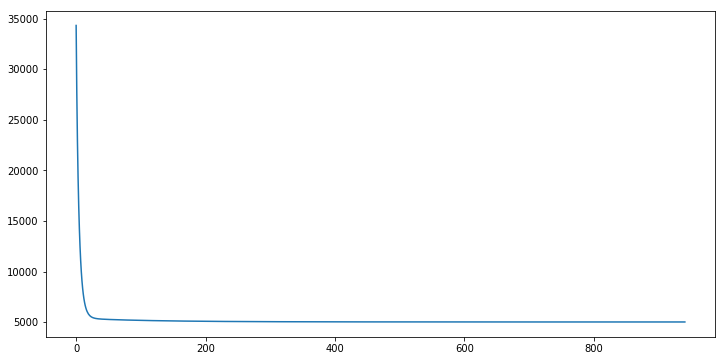

In [26]:
# plot loss against number of iterations

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
plt.plot(range(len(losses)), losses)
plt.show()

- <b>Step 4</b>

  - Calculate the RMSE of your trained model on test data

In [27]:
# Step 4
from sklearn.metrics.regression import r2_score

y_pred = np.dot(X_test, np.array(current_theta))
mse = mean_squared_error(y_test, y_pred)
rms = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

In [28]:
print(f'mse: {mse}, rmse: {rmse}, r2_score: {r2}')

mse: 10213.063729938096, rmse: 101.04353828872426, r2_score: 0.7005045894548345
